Dataset link: https://www.kaggle.com/datasets/praveengovi/emotions-dataset-for-nlp/data

### Importing necessary libraries

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

In [71]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [108]:
from sklearn.naive_bayes import MultinomialNB

In [33]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Importing text files

In [53]:
train = pd.read_csv("train.txt", delimiter=";", header=None)
train.head()

,0,1
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


#### Function for renaming the columns

In [54]:
def label_column(df):
    df['text'] = df.iloc[:,0]
    df['label'] = df.iloc[:,1]
    df.drop([0,1],axis=1,inplace=True)
    return df

In [55]:
train = label_column(train)
train.head()

,text,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [56]:
test = pd.read_csv("test.txt", delimiter=";", header=None)
test = label_column(test)
test.head()

,text,label
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness


In [57]:
val = pd.read_csv("val.txt", delimiter=";", header=None)
val = label_column(val)
val.head()

,text,label
0,im feeling quite sad and sorry for myself but ...,sadness
1,i feel like i am still looking at a blank canv...,sadness
2,i feel like a faithful servant,love
3,i am just feeling cranky and blue,anger
4,i can have for a treat or if i am feeling festive,joy


In [58]:
train.shape, test.shape, val.shape

((16000, 2), (2000, 2), (2000, 2))

In [59]:
train['label'].value_counts()

joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: label, dtype: int64

In [60]:
test['label'].value_counts()

joy         695
sadness     581
anger       275
fear        224
love        159
surprise     66
Name: label, dtype: int64

In [61]:
val['label'].value_counts()

joy         704
sadness     550
anger       275
fear        212
love        178
surprise     81
Name: label, dtype: int64

### Concatinating test and val dataframe in test dataframe

In [62]:
test = pd.concat([test,val],axis=0)
test.shape

(4000, 2)

### Checking for null values

In [63]:
train.isnull().sum()

text     0
label    0
dtype: int64

In [64]:
test.isnull().sum()

text     0
label    0
dtype: int64

### Emotions Distribution

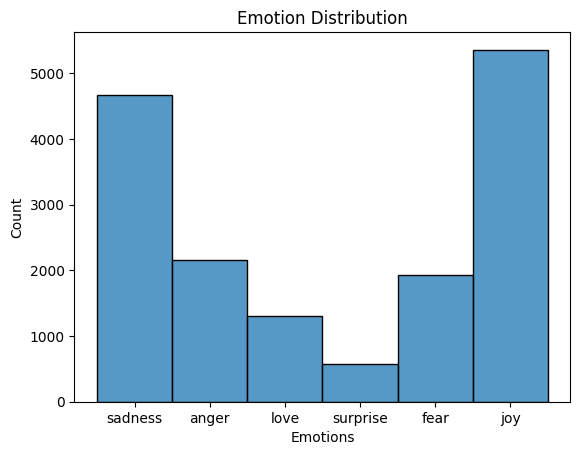

In [105]:
sns.histplot(data=train, x="label")
plt.title("Emotion Distribution")
plt.xlabel("Emotions")
plt.ylabel("Count")
plt.show()

### Text Preprocessing

In [65]:
lemmatizer = WordNetLemmatizer()

In [66]:
stemmer = PorterStemmer()

In [67]:
def cleaned_text(df, column):
    # Filtering the text
    df[column].replace("[^a-zA-Z]"," ",regex=True, inplace=True)
    for i in range(len(df[column])):
        # Lowering the text
        text = df[column][i].lower()
        # Spliting the text
        text = text.split()
        # Removing stopwords and then performing stemming
        text = [stemmer.stem(word) for word in text if word not in set(stopwords.words("english"))]
        # Joining the words
        text = " ".join(text)
        df[column][i] = text
    return None

In [68]:
train['text'][:6]

0                              i didnt feel humiliated
1    i can go from feeling so hopeless to so damned...
2     im grabbing a minute to post i feel greedy wrong
3    i am ever feeling nostalgic about the fireplac...
4                                 i am feeling grouchy
5    ive been feeling a little burdened lately wasn...
Name: text, dtype: object

In [69]:
cleaned_text(train, "text")

In [70]:
train['text'][:6]

0                                    didnt feel humili
1    go feel hopeless damn hope around someon care ...
2                 im grab minut post feel greedi wrong
3       ever feel nostalg fireplac know still properti
4                                         feel grouchi
5                ive feel littl burden late wasnt sure
Name: text, dtype: object

### Converting Labels to numeric values

In [72]:
encoder = LabelEncoder()

y_train = encoder.fit_transform(train['label'])
y_test = encoder.transform(test['label'])

In [75]:
pd.DataFrame(y_train).value_counts()

2    5362
4    4666
0    2159
1    1937
3    1304
5     572
dtype: int64

anger mapped to 0;
fear mapped to 1;
joy mapped to 2;
love mapped to 3;
sadness mapped to 4;
surprise mapped to 5

### Converting Words into Vectors

#### 1. Bag of Words

In [106]:
bow = CountVectorizer(ngram_range=(1,1))
X_train = bow.fit_transform(train['text'])
X_test = bow.transform(test['text'])

In [107]:
X_train.shape

(16000, 10359)

### 1. Random Forest Classifier

#### Training our model

In [100]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier()

#### Prediction for X_test

In [101]:
y_pred = forest.predict(X_test)

#### Accuracy Score

In [102]:
accuracy_score(y_test,y_pred)

0.21625

#### Confusion Matrix

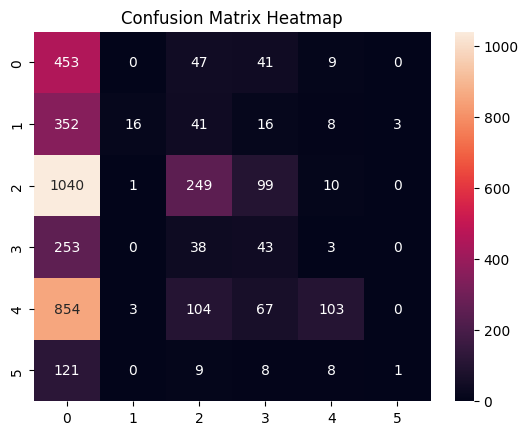

In [103]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt=".0f")
plt.title("Confusion Matrix Heatmap")
plt.show()

#### Classification Report

In [104]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.15      0.82      0.25       550
           1       0.80      0.04      0.07       436
           2       0.51      0.18      0.26      1399
           3       0.16      0.13      0.14       337
           4       0.73      0.09      0.16      1131
           5       0.25      0.01      0.01       147

    accuracy                           0.22      4000
   macro avg       0.43      0.21      0.15      4000
weighted avg       0.51      0.22      0.19      4000



### 2. Multinomial Naive Bayes Classification

#### Training our model

In [109]:
multinomial = MultinomialNB()

multinomial.fit(X_train, y_train)

MultinomialNB()

#### Prediction for X_test

In [110]:
y_pred = multinomial.predict(X_test)

#### Accuracy Score

In [111]:
accuracy_score(y_test,y_pred)

0.46375

#### Confusion Matrix

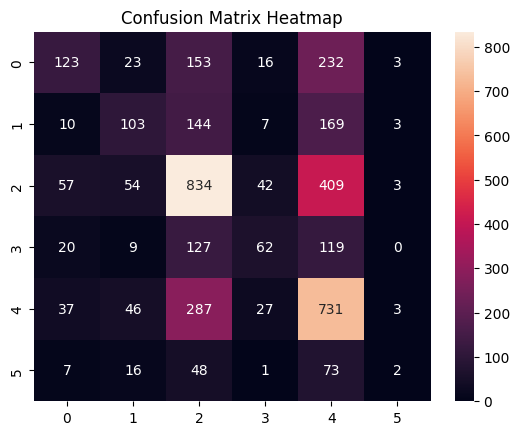

In [112]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt=".0f")
plt.title("Confusion Matrix Heatmap")
plt.show()

#### Classification Report

In [113]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.48      0.22      0.31       550
           1       0.41      0.24      0.30       436
           2       0.52      0.60      0.56      1399
           3       0.40      0.18      0.25       337
           4       0.42      0.65      0.51      1131
           5       0.14      0.01      0.02       147

    accuracy                           0.46      4000
   macro avg       0.40      0.32      0.33      4000
weighted avg       0.45      0.46      0.44      4000

